<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/Cat_%26_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect Google Drive and List Files

In [8]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# List image files
print(os.listdir('/content/drive/My Drive/CNN Images/Cat and Dogs'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['train', 'test']


Import TensorFlow and Other Libraries

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

# Check the TensorFlow version
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.17.0


Prepare Training and Test Data with Data Augmentation

In [10]:
# Prepare training and test data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train set
training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/CNN Images/Cat and Dogs/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Load the test set
test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/CNN Images/Cat and Dogs/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


Build and Compile the CNN Model

In [11]:
# Build the CNN model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the Model and Visualize the Results

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.4643 - loss: 0.7588 - val_accuracy: 0.4929 - val_loss: 0.6934
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 430ms/step - accuracy: 0.5265 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 470ms/step - accuracy: 0.5517 - loss: 0.6857 - val_accuracy: 0.5500 - val_loss: 0.6968
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - accuracy: 0.6025 - loss: 0.6673 - val_accuracy: 0.5500 - val_loss: 0.6964
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.5548 - loss: 0.6716 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 443ms/step - accuracy: 0.5900 - loss: 0.6471 - val_accuracy: 0.5143 - val_loss: 0.6823
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.6458 - loss: 0.6332 - val_accuracy: 0.6214 - val_loss: 0.6659
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - accuracy: 0.7001 - loss: 0.5828 - val_accu

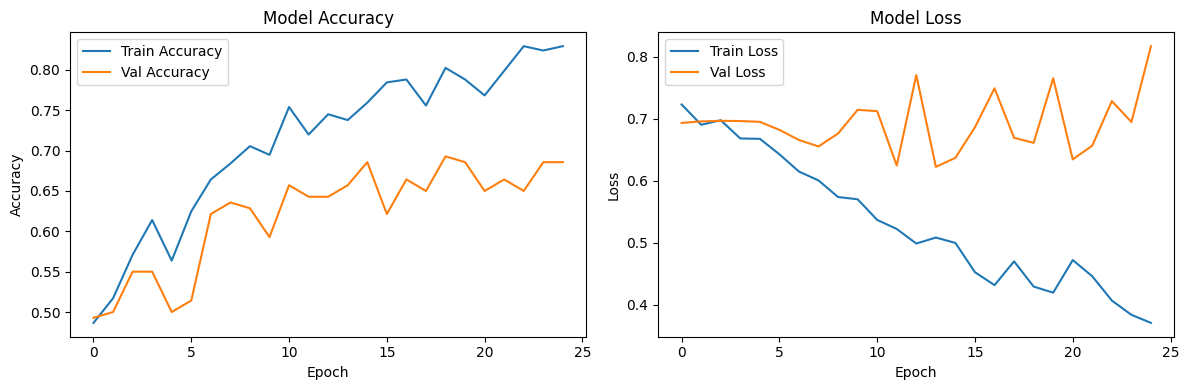

In [12]:
# Training the Model
history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25
)

# Visualize training and validation losses and accuracies
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

Make Predictions with a Test Image

In [14]:
test_image_path = '/content/drive/My Drive/CNN Images/Cat and Dogs/test/dogs/dog_177.jpg'
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)
class_indices = training_set.class_indices
prediction = 'dog' if result[0][0] == 1 else 'cat'

print(f'Predicted label: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: dog
